# Task
apply clustering models  and visualize each model
KMeans cluster
Heirarchal Cluster
DBSCAN
MeanShift

Here is all the data you need:
"pirvision_transformed.csv"

## Data loading

### Subtask:
Load the data from "pirvision_transformed.csv" into a dataframe.


**Reasoning**:
Load the data from "pirvision_transformed.csv" into a pandas DataFrame and display the first 5 rows and the shape.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


df = pd.read_csv('pirvision_transformed.csv')
display(df.head())
print(df.shape)

,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,...,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55,Hour,Minute,DayOfWeek,Month
0,0,0.245676,-0.055875,-0.494950,-0.551045,-0.616061,-0.558023,-0.230890,0.165129,0.450680,...,-0.572173,-0.483428,-0.355541,-0.314113,-0.376149,-0.267425,19,19,3,8
1,1,0.245676,-0.055853,-0.180633,-0.333270,-0.513508,-0.663652,-0.484048,-0.277654,0.084387,...,-0.425187,-0.510887,-0.529183,-0.513220,-0.404123,-0.205231,19,20,3,8
2,0,0.245676,-0.055861,-0.373279,-0.488606,-0.507475,-0.358319,-0.255089,-0.048284,0.160448,...,-0.484681,-0.432172,-0.423068,-0.431114,-0.341720,-0.409584,19,20,3,8
3,0,0.245676,-0.055899,-0.995152,-1.059694,-0.671862,-0.219681,0.072528,0.414444,0.640832,...,-0.654415,-0.542007,-0.396057,-0.188902,-0.051221,0.030219,19,20,3,8
4,0,0.245676,-0.055863,-0.586203,-0.630236,-0.519540,-0.231234,0.035299,0.280811,0.264531,...,-0.629918,-0.525531,-0.318883,-0.318218,-0.339568,-0.094170,19,21,3,8


(7651, 61)


## Data preparation

### Subtask:
Prepare the data for clustering by scaling the features.


**Reasoning**:
Scale the features using StandardScaler and store the result in a new DataFrame.



In [ ]:

# Apply PCA for dimensionality reduction to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

## Data clustering

### Subtask:
Apply KMeans, Heirarchal Clustering, DBSCAN, and MeanShift clustering algorithms to the prepared data.

##Kmean Clustering


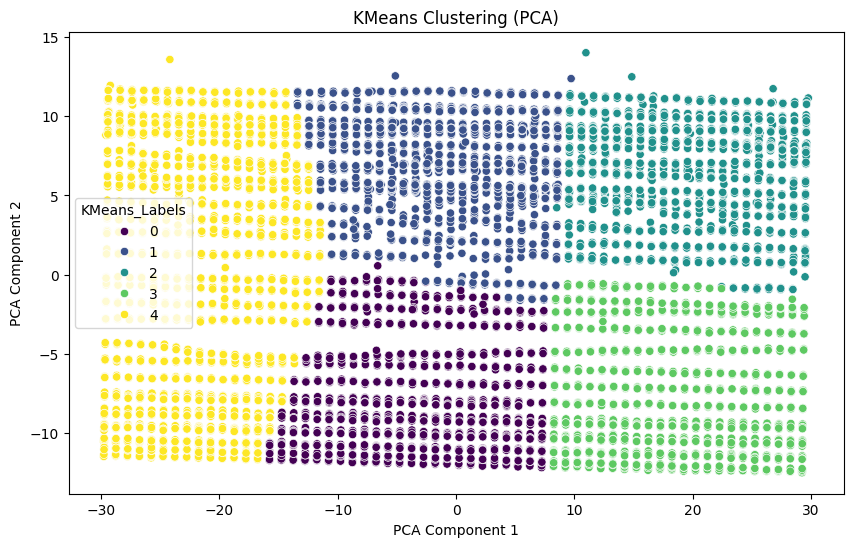

In [ ]:


# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_pca['KMeans_Labels'] = kmeans.fit_predict(df)


# Function to visualize clustering results using PCA components
def visualize_clustering_pca(df_pca, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue=labels, palette='viridis', legend='full', data=df_pca)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Visualize KMeans clustering
visualize_clustering_pca(df_pca, df_pca['KMeans_Labels'], 'KMeans Clustering (PCA)')


##Heirarchal Clustering

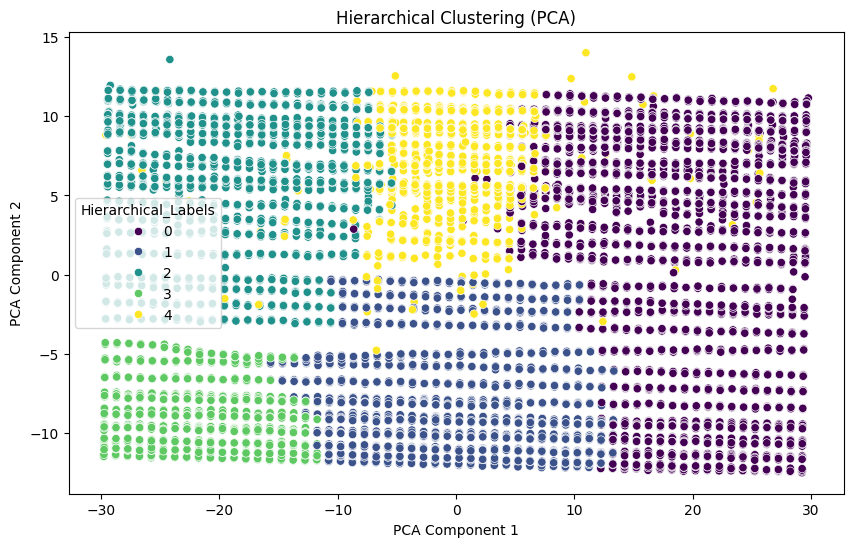

In [ ]:

# **Reasoning**:
# Apply Agglomerative Clustering to the scaled data.

agg_clustering = AgglomerativeClustering(n_clusters=5)
df_pca['Hierarchical_Labels'] = agg_clustering.fit_predict(df)

# Visualize Hierarchical clustering
visualize_clustering_pca(df_pca, df_pca['Hierarchical_Labels'], 'Hierarchical Clustering (PCA)')


##DBSCAN

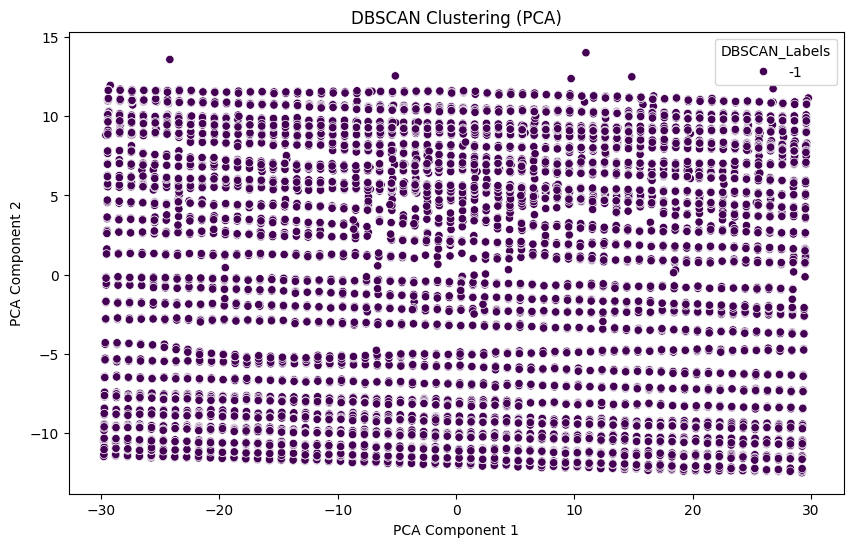

In [ ]:

# **Reasoning**:
# Apply DBSCAN clustering to the scaled data.

dbscan = DBSCAN(eps=0.5, min_samples=5)
df_pca['DBSCAN_Labels'] = dbscan.fit_predict(df)

# Visualize DBSCAN clustering
visualize_clustering_pca(df_pca, df_pca['DBSCAN_Labels'], 'DBSCAN Clustering (PCA)')


# MeanShift clustering

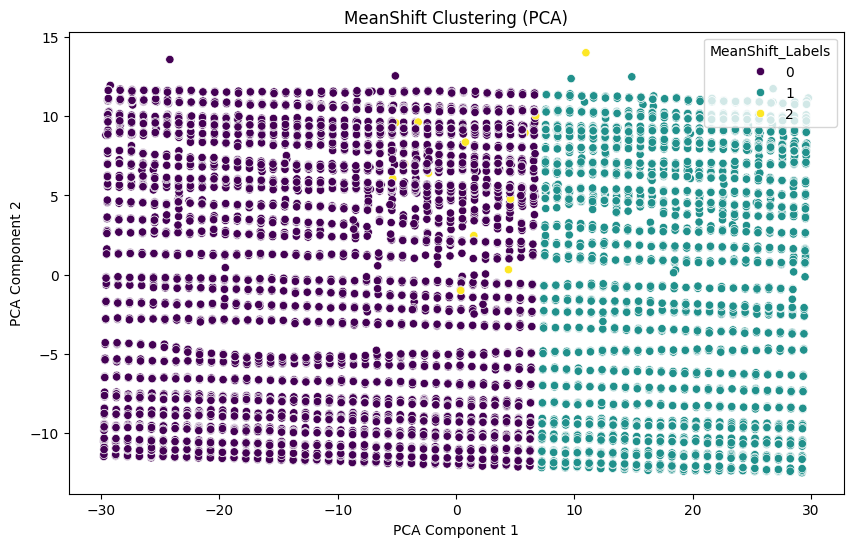

In [ ]:

# **Reasoning**:
# Apply MeanShift clustering to the scaled data.

bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df_pca['MeanShift_Labels'] = ms.fit_predict(df)

# Visualize MeanShift clustering
visualize_clustering_pca(df_pca, df_pca['MeanShift_Labels'], 'MeanShift Clustering (PCA)')
